In [3]:
using ModelingToolkit, DomainSets, Sophon, CairoMakie, Lux
using Optimization, OptimizationOptimJL

@parameters x, t
@variables θ₁(..), θ₂(..), w₁(..), w₂(..)
Dₜ = Differential(t)
Dₜ² = Differential(t)^2
Dₓ = Differential(x)
Dₓ² = Differential(x)^2

f₁(x,t) = cos(t)*(1-sin(x))
f₂(x,t) = 2/π * cos(t)*(1-sin(x))

eqs = [
    Dₓ(θ₁(x,t)) - Dₓ²(w₁(x,t)) + Dₜ²(w₁(x,t)) + w₁(x,t) - w₂(x,t) ~ f₁(x,t),
    Dₓ(θ₂(x,t)) - Dₓ²(w₂(x,t)) + Dₜ²(w₂(x,t)) + w₂(x,t) - w₁(x,t) ~ f₂(x,t),
    Dₜ²(θ₁(x,t)) ~ Dₓ²(θ₁(x,t)) + Dₓ(w₁(x,t)) - θ₁(x,t),
    Dₜ²(θ₂(x,t)) ~ Dₓ²(θ₂(x,t)) + Dₓ(w₂(x,t)) - θ₂(x,t),
]

bcs = [
    θ₁(x, 0.0) ~ π/2*cos(x) + x - π/2,
    Dₜ(θ₁(x, 0.0)) ~ 0.0,
    w₁(x, 0.0) ~ π/2*sin(x),
    Dₜ(w₁(x, 0.0)) ~ 0.0,
    θ₂(x, 0.0) ~ cos(x) + 2/π * x - 1,
    Dₜ(θ₂(x, 0.0)) ~ 0.0,
    w₂(x, 0.0) ~ sin(x),
    Dₜ(w₂(x, 0.0)) ~ 0.0,
    θ₁(0.0, t) ~ 0.0,
    θ₁(π, t) ~ 0.0,
    w₁(0.0, t) ~ 0.0,
    w₁(π, t) ~ 0.0,
    θ₂(0.0, t) ~ 0.0,
    θ₂(π, t) ~ 0.0,
    w₂(0.0, t) ~ 0.0,
    w₂(π, t) ~ 0.0]

    
domains = [x ∈ Interval(0.0, π),
           t ∈ Interval(0.0, 1.0)]

@named timo_double = PDESystem(eqs, bcs, domains, [x,t], [θ₁,θ₂,w₁,w₂])

PDESystem
Equations: Equation[Differential(t)(Differential(t)(w₁(x, t))) + Differential(x)(θ₁(x, t)) + w₁(x, t) - Differential(x)(Differential(x)(w₁(x, t))) - w₂(x, t) ~ (1 - sin(x))*cos(t), Differential(t)(Differential(t)(w₂(x, t))) + Differential(x)(θ₂(x, t)) + w₂(x, t) - Differential(x)(Differential(x)(w₂(x, t))) - w₁(x, t) ~ 0.6366197723675814(1 - sin(x))*cos(t), Differential(t)(Differential(t)(θ₁(x, t))) ~ Differential(x)(Differential(x)(θ₁(x, t))) + Differential(x)(w₁(x, t)) - θ₁(x, t), Differential(t)(Differential(t)(θ₂(x, t))) ~ Differential(x)(Differential(x)(θ₂(x, t))) + Differential(x)(w₂(x, t)) - θ₂(x, t)]
Boundary Conditions: Equation[θ₁(x, 0.0) ~ x + 1.5707963267948966cos(x) - 1.5707963267948966, Differential(t)(θ₁(x, 0.0)) ~ 0.0, w₁(x, 0.0) ~ 1.5707963267948966sin(x), Differential(t)(w₁(x, 0.0)) ~ 0.0, θ₂(x, 0.0) ~ 0.6366197723675814x + cos(x) - 1, Differential(t)(θ₂(x, 0.0)) ~ 0.0, w₂(x, 0.0) ~ sin(x), Differential(t)(w₂(x, 0.0)) ~ 0.0, θ₁(0.0, t) ~ 0.0, θ₁(π, t) ~ 0.0,

In [4]:
pinn = PINN(θ₁ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            θ₂ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            w₁ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1),
            w₂ = Siren(2,1; hidden_dims=16,num_layers=4,omega=1))

sampler = QuasiRandomSampler(2000, 500)
strategy = NonAdaptiveTraining(1, 10)

prob = Sophon.discretize(timo_double, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.10776692628860474 0.043944716453552246; -0.2584993839263916 -0.13734281063079834; … ; -0.3802070617675781 -0.3543299436569214; 0.23358434438705444 -0.012989580631256104], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.3634936809539795 -0.16310234367847443 … -0.05125129967927933 0.22115057706832886; -0.05296148359775543 0.0005923988646827638 … -0.010502871125936508 -0.4549451172351837; … ; -0.2720010280609131 0.29513683915138245 … -0.17950402200222015 -0.5964997410774231; 0.24145878851413727 -0.059669129550457 … -0.3882499933242798 -0.5080980658531189], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.4513562023639679 0.23826822638511658 … 0.035736799240112305 -0.4176631271839142; 0.3584228456020355 -0.43254703283309937 … 0.04490179196000099 -0.43032607436180115; … ; -0.2238769233226776 -0.2779363989830017 … 0.47625425457954407 0.44329729676246643; -0.5171889066696167 0

In [21]:
using OptimizationOptimisers
function callback(p, l)
   # println("Loss: $l")
    return false
end

bfgs = BFGS()

res = Optimization.solve(prob, bfgs; maxiters=1000, callback=callback)

u: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.020525875049323603 0.06227700341871448; -0.01942146905874429 -0.05518451652749145; … ; -0.4416922891788435 -0.37027688222823596; 0.2174638784383328 0.2656890449056791], bias = [-0.10694463864665; 0.023260328936176623; … ; -0.2542712900239396; -0.03104962652087309;;]), layer_2 = (weight = [-0.32815146609971946 -0.1854000531789721 … -0.0768097468663901 0.16754603395049913; -0.02918536179773116 0.07588849544479269 … 0.012755808324265865 -0.5112028312987271; … ; -0.25015354448570404 0.3055975420820072 … -0.2711134823138923 -0.6411845611572541; 0.28441468866889963 -0.03369622328611263 … -0.4234430853586277 -0.5152360067153843], bias = [-0.03094746977468749; 0.11778091611337765; … ; -0.008659970716757984; 0.10919318436413024;;]), layer_3 = (weight = [-0.502426475024222 0.025369134633304195 … 0.047650191874932045 -0.40060296521103955; 0.20314103136642758 -0.3703082213535673 … 0.06418982555520723 -0.35035296563153523; … ; -0.28838139571

In [22]:
res.objective

4.267756197495293e-6

In [26]:
data = Sophon.sample(timo_double, sampler)
prob = remake(prob; u0=res.u, p=data)
res = Optimization.solve(prob, bfgs; maxiters=500, callback=callback)

u: ComponentVector{Float64}(θ₁ = (layer_1 = (weight = [-0.033145752013146644 0.07762187929482374; -0.004123072634493575 -0.059937074141182975; … ; -0.4383413025512484 -0.3623569130634466; 0.2112090030668924 0.2618531318468003], bias = [-0.1046379561778805; 0.03691550107508847; … ; -0.25883162334333426; -0.026961798158134233;;]), layer_2 = (weight = [-0.32606429479682864 -0.18645505943068497 … -0.06423168083751728 0.16545005575988989; -0.02784389191600286 0.07512889527567282 … 0.018294407107276665 -0.5117065735590052; … ; -0.252165498183084 0.30536243517029926 … -0.2693570825913301 -0.6346246299156179; 0.28510806668261607 -0.03411347743945424 … -0.4221110895816701 -0.5140327409757517], bias = [-0.03635729899488642; 0.11533167507302823; … ; -0.003915961906973211; 0.1064300626236652;;]), layer_3 = (weight = [-0.5014890215245907 0.027144617224212183 … 0.04493501155344566 -0.4019851620810383; 0.1997688518225804 -0.37244366995252104 … 0.06175413719335609 -0.35010979141493714; … ; -0.28306097

In [27]:
res.objective

1.6975439338999838e-6

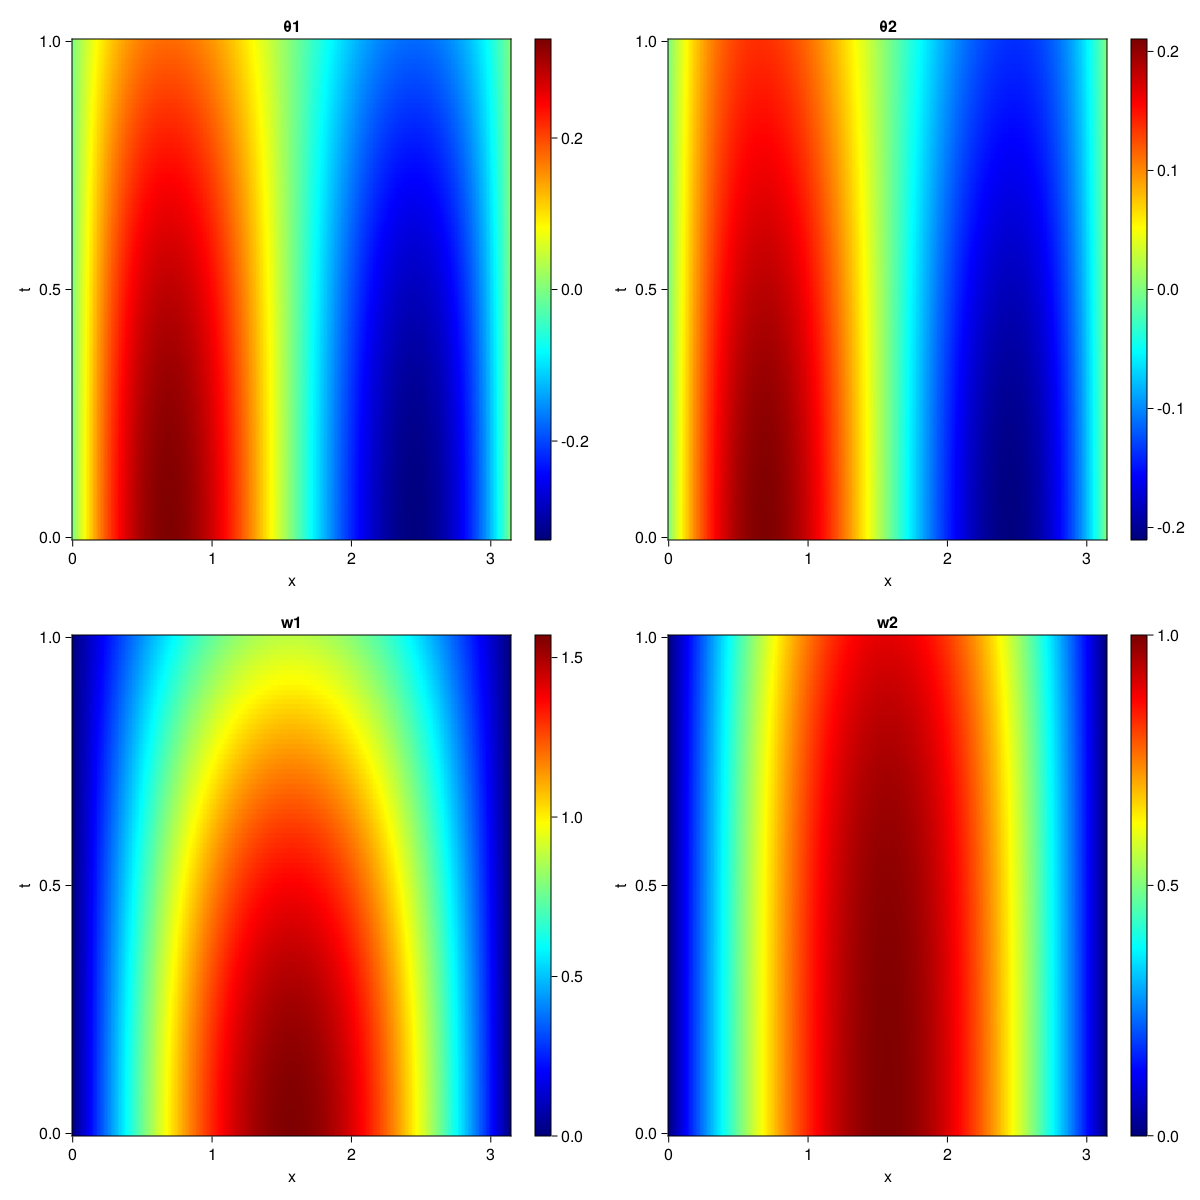

In [28]:
phi = pinn.phi
ps = res.u

xs, ts= [infimum(d.domain):0.01:supremum(d.domain) for d in timo_double.domain]


θ₁ = [sum(phi.θ₁(([x,t]), ps.θ₁)) for x in xs, t in ts]
θ₂ = [sum(phi.θ₂(([x,t]), ps.θ₂)) for x in xs, t in ts]
w₁ = [sum(phi.w₁(([x,t]), ps.w₁)) for x in xs, t in ts]
w₂ = [sum(phi.w₂(([x,t]), ps.w₂)) for x in xs, t in ts]

fig = Figure(resolution=(1200,1200))
axis = (xlabel="x", ylabel="t", title="f1")


_, hm3 = heatmap(fig[1, 1], xs, ts, θ₁, axis= merge(axis, (; title="θ1")), colormap=:jet)
Colorbar(fig[1, 2], hm3)
_, hm4 = heatmap(fig[1, 3], xs, ts, θ₂, axis= merge(axis, (; title="θ2")), colormap=:jet)
Colorbar(fig[1, 4], hm4)
_, hm5 = heatmap(fig[2, 1], xs, ts, w₁, axis= merge(axis, (; title="w1")), colormap=:jet)
Colorbar(fig[2, 2], hm5)
_, hm6 = heatmap(fig[2, 3], xs, ts, w₂, axis= merge(axis, (; title="w2")), colormap=:jet)
Colorbar(fig[2, 4], hm6)

display(fig)

In [29]:
θ₁_analytic(x,t) = (π/2*cos(x) + x - π/2)*cos(t) 
θ₂_analytic(x,t) = (cos(x) + 2/π * x - 1)*cos(t)
w₁_analytic(x,t) = π/2*sin(x)*cos(t)
w₂_analytic(x,t) = sin(x)*cos(t)

w₂_analytic (generic function with 1 method)

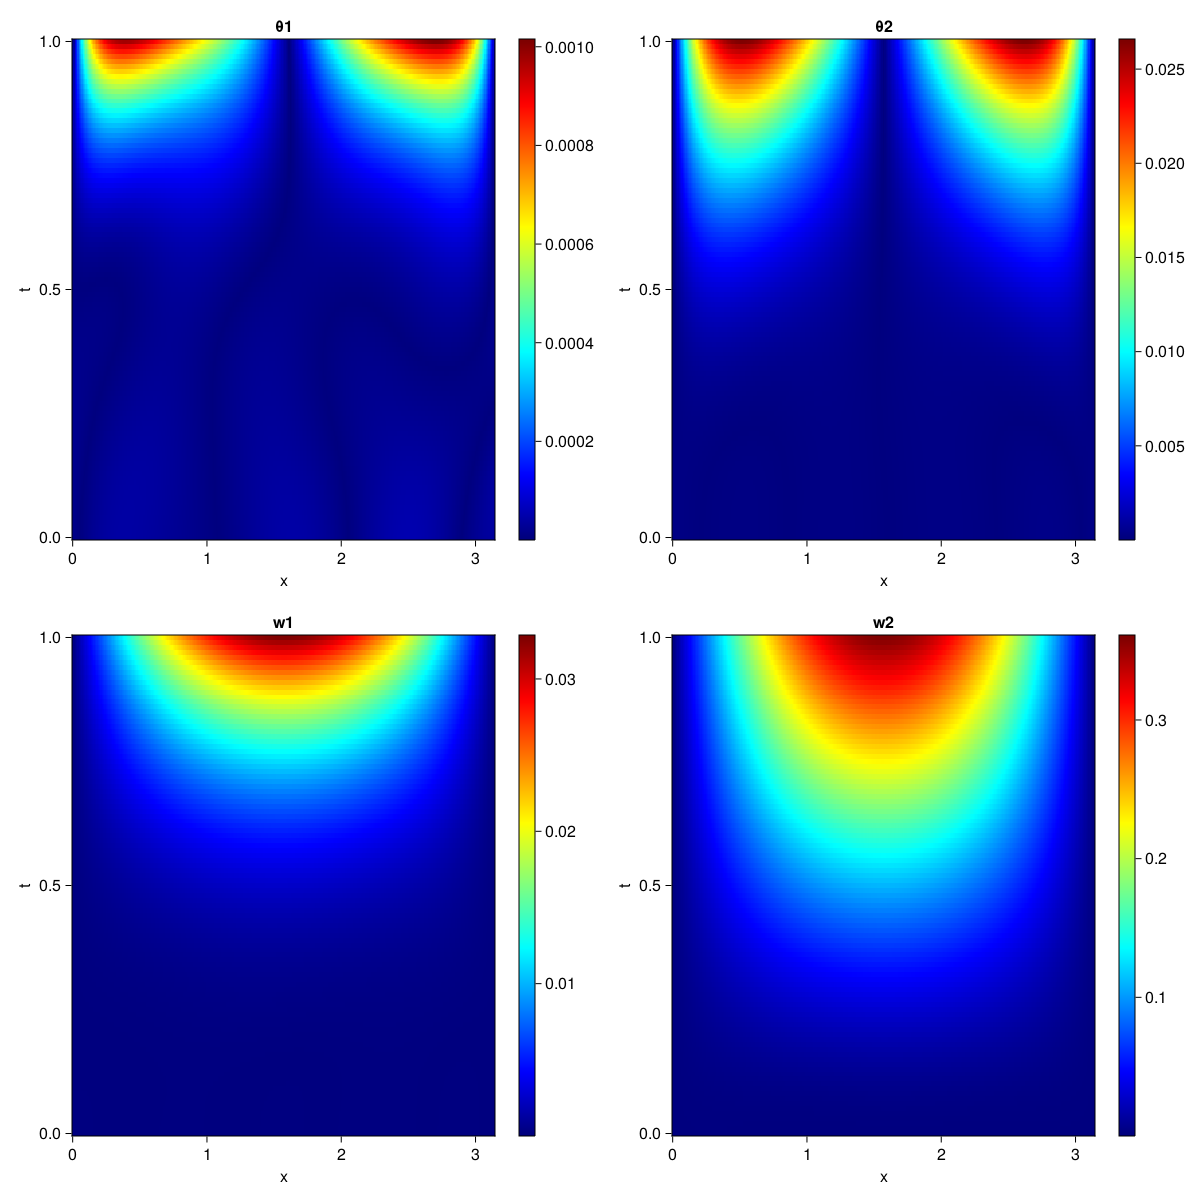

In [30]:
θ₁_true = [θ₁_analytic(x,t) for x in xs, t in ts]
θ₂_true = [θ₂_analytic(x,t) for x in xs, t in ts]
w₁_true = [w₁_analytic(x,t) for x in xs, t in ts]
w₂_true = [w₂_analytic(x,t) for x in xs, t in ts]

fig = Figure(resolution=(1200,1200))
axis = (xlabel="x", ylabel="t", title="f1 error")


_, hm3 = heatmap(fig[1, 1], xs, ts, abs.(θ₁ .- θ₁_true), axis= merge(axis, (; title="θ1")), colormap=:jet)
Colorbar(fig[1, 2], hm3)
_, hm4 = heatmap(fig[1, 3], xs, ts, abs.(θ₂ .- θ₂_true), axis= merge(axis, (; title="θ2")), colormap=:jet)
Colorbar(fig[1, 4], hm4)

_, hm5 = heatmap(fig[2, 1], xs, ts, abs.(w₁ .- w₁_true), axis= merge(axis, (; title="w1")), colormap=:jet)
Colorbar(fig[2, 2], hm5)
_, hm6 = heatmap(fig[2, 3], xs, ts, abs.(w₂ .- w₂_true), axis= merge(axis, (; title="w2")), colormap=:jet)
Colorbar(fig[2, 4], hm6)


display(fig)